<a href="https://colab.research.google.com/github/fralfaro/MAT281_2023/blob/main/docs/labs/lab_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorios N°06

- Felipe Asbún
- Rol: 202010509-K

<a id='p1'></a>
## I.- Problema 01


<img src="https://drive.google.com/uc?export=view&id=1iLbdUKIrQByZ_yJFKOonV2VK4UL1aMvA" width = "400" align="center"/>



El **cuarteto de Anscombe** comprende cuatro conjuntos de datos que tienen las mismas propiedades estadísticas, pero que evidentemente son distintas al inspeccionar sus gráficos respectivos.

Cada conjunto consiste de once puntos (x, y) y fueron construidos por el estadístico F. J. Anscombe. El cuarteto es una demostración de la importancia de mirar gráficamente un conjunto de datos antes de analizarlos.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [ ]:
# Cargar los datos del cuarteto de Anscombe
data = sns.load_dataset("anscombe")
data.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


Basado en la información presentada responda las siguientes preguntas:

1. Gráfique mediante un gráfico tipo **scatter** cada grupo. A simple vista, ¿ los grupos son muy distintos entre si?.

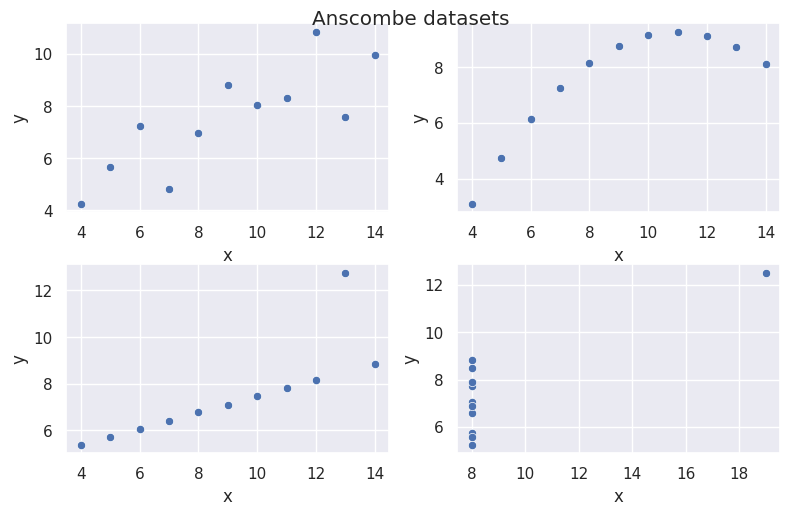

In [ ]:
fig, axes = plt.subplots(figsize=(8,5), nrows=2, ncols=2)
fig.tight_layout()
fig.suptitle('Anscombe datasets')
data_types = ['I', 'II', 'III', 'IV']
for i, t in enumerate(data_types):
    sns.scatterplot(data=data[data['dataset']==t], x='x', y='y', ax=axes[i//2,i%2])


2. Realice un resumen de las medidas estadísticas más significativas ocuapando el comando `describe` para cada grupo. Interprete.

In [ ]:
data_types = ['I', 'II', 'III', 'IV']
for i, t in enumerate(data_types):
    print('Dataset', t)
    display(data[data['dataset']==t].describe())

Dataset I


,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031568
min,4.000000,4.260000
25%,6.500000,6.315000
50%,9.000000,7.580000
75%,11.500000,8.570000
max,14.000000,10.840000


Dataset II


,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031657
min,4.000000,3.100000
25%,6.500000,6.695000
50%,9.000000,8.140000
75%,11.500000,8.950000
max,14.000000,9.260000


Dataset III


,x,y
count,11.000000,11.000000
mean,9.000000,7.500000
std,3.316625,2.030424
min,4.000000,5.390000
25%,6.500000,6.250000
50%,9.000000,7.110000
75%,11.500000,7.980000
max,14.000000,12.740000


Dataset IV


,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.030579
min,8.000000,5.250000
25%,8.000000,6.170000
50%,8.000000,7.040000
75%,8.000000,8.190000
max,19.000000,12.500000


3. Realice un ajuste lineal (con **sklearn**) y calcule los resultados de las métricas para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete.

Metrics: I
MSE:  1.2511536363636366
R2:   0.6665424595087748 

Metrics: II
MSE:  1.2523900826446281
R2:   0.6662420337274844 

Metrics: III
MSE:  1.2505628925619836
R2:   0.6663240410665592 

Metrics: IV
MSE:  1.249317272727273
R2:   0.6667072568984653 



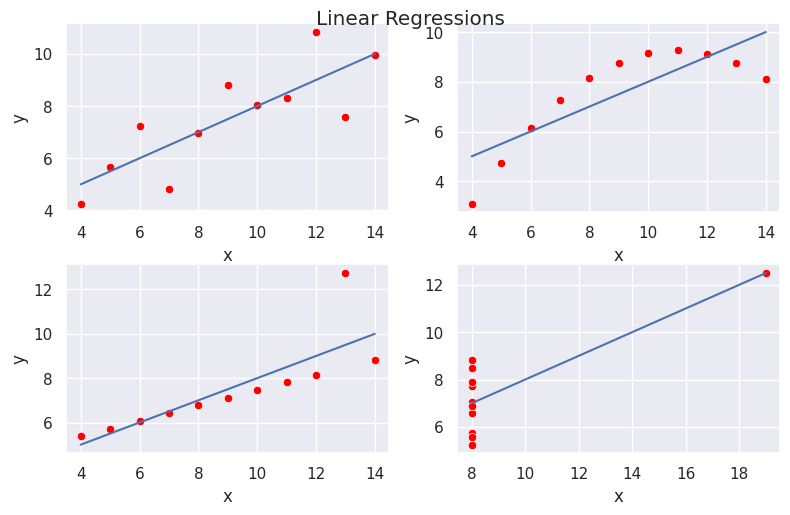

In [ ]:
data_types = ['I', 'II', 'III', 'IV']
fig, axes = plt.subplots(figsize=(8,5), nrows=2, ncols=2)
fig.tight_layout()
fig.suptitle('Linear Regressions')

for i, t in enumerate(data_types):
    X = data[data['dataset']==t]['x'].to_numpy().reshape(-1,1)
    y = data[data['dataset']==t]['y'].to_numpy().reshape(-1,1)

    model = LinearRegression().fit(X,y)
    y_pred = model.predict(X).reshape(1,-1)[0]
    pred = pd.DataFrame({'set': t ,'x': X.reshape(1,-1)[0], 'y_pred': y_pred})
    print('Metrics:', t)

    print('MSE: ', mean_squared_error(y, y_pred))
    print('R2:  ', r2_score(y, y_pred), '\n')


    sns.scatterplot(data=data[data['dataset']==t], x='x', y='y', ax=axes[i//2,i%2], color='red')
    sns.lineplot(data=pred, x='x', y='y_pred', ax=axes[i//2,i%2])


4. Es claro que el ajuste lineal para algunos grupos no es el correcto. Existen varias formas de solucionar este problema (eliminar outliers, otros modelos, etc.). Identifique una estrategia para que el modelo de regresión lineal ajuste de mejor manera e implemente otros modelos en los casos que encuentre necesario.  

La primera regresión es razonable, sin embargo,
- El segundo dataset parece seguir otra regla, como una cuadrática.
- El tercer dataset tiene un outlier (x = 13) que impide ajustar correctamente a la lineal.
- El cuarto dataset, además de tener un outlier (x=19), los ejes están invertidos.

Metrics: I
MSE:  1.2511536363636366
R2:   0.6665424595087748 

Metrics: II
MSE:  2.034329307058384e-06
R2:   0.999999457857722 

Metrics: III
MSE:  7.597402597401847e-06
R2:   0.999993107581533 

Metrics: IV
MSE:  2.37225
R2:   -0.726215554823034 



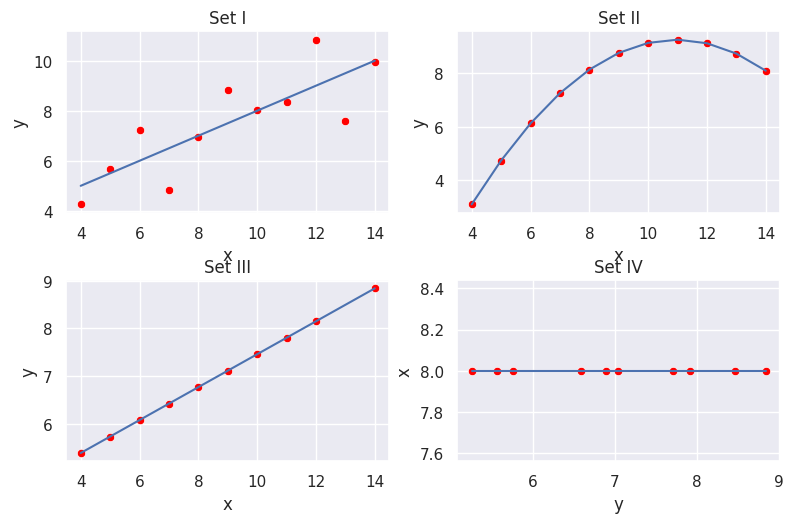

In [ ]:
data_types = ['I', 'II', 'III', 'IV']
fig, axes = plt.subplots(figsize=(8,5), nrows=2, ncols=2)
fig.tight_layout(h_pad=2)

for i, t in enumerate(data_types):
    X = data[data['dataset']==t]['x'].to_numpy().reshape(-1,1)
    y = data[data['dataset']==t]['y'].to_numpy().reshape(-1,1)

    if i==0:
        model = LinearRegression().fit(X,y)
        y_pred = model.predict(X).reshape(1,-1)[0]

        pred = pd.DataFrame({'set': t ,'x': X.reshape(1,-1)[0], 'y_pred': y_pred})
        print('Metrics:', t)
        print('MSE: ', mean_squared_error(y, y_pred))
        print('R2:  ', r2_score(y, y_pred), '\n')

        sns.scatterplot(data=data[data['dataset']==t], x='x', y='y', ax=axes[i//2,i%2], color='red')
        sns.lineplot(data=pred, x='x', y='y_pred', ax=axes[i//2,i%2])
        axes[i//2,i%2].set_title('Set I')

    if i==1:
        X = data[data['dataset']=='II']['x'].to_numpy().reshape(1,-1)[0]
        y = data[data['dataset']=='II']['y'].to_numpy().reshape(1,-1)[0]

        model = np.polyfit(X, y, 2)
        y_pred = model[0]*X*X + model[1]*X + model[2]
        pred = pd.DataFrame({'set': t ,'x': X, 'y_pred': y_pred})
        print('Metrics:', t)
        print('MSE: ', mean_squared_error(y, y_pred))
        print('R2:  ', r2_score(y, y_pred), '\n')

        sns.scatterplot(data=data[data['dataset']==t], x='x', y='y', ax=axes[i//2,i%2], color='red')
        sns.lineplot(data=pred, x='x', y='y_pred', ax=axes[i//2,i%2])
        axes[i//2,i%2].set_title('Set II')
    if i==2:
        X = np.delete(X,2).reshape(-1,1)
        y = np.delete(y,2).reshape(-1,1)

        model = LinearRegression().fit(X,y)
        y_pred = model.predict(X).reshape(1,-1)[0]
        pred = pd.DataFrame({'set': t ,'x': X.reshape(1,-1)[0], 'y_pred': y_pred})
        print('Metrics:', t)
        print('MSE: ', mean_squared_error(y, y_pred))
        print('R2:  ', r2_score(y, y_pred), '\n')

        new_set = pd.DataFrame({'x': X.reshape(1,-1)[0], 'y': y.reshape(1,-1)[0]})
        sns.scatterplot(data=new_set, x='x', y='y', ax=axes[i//2,i%2], color='red')
        sns.lineplot(data=pred, x='x', y='y_pred', ax=axes[i//2,i%2])
        axes[i//2,i%2].set_title('Set III')

    if i==3:
        X = np.delete(X,7).reshape(-1,1)
        y = np.delete(y,7).reshape(-1,1)

        model = LinearRegression().fit(y,X)
        y_pred = model.predict(y).reshape(1,-1)[0]
        pred = pd.DataFrame({'set': t ,'x': y.reshape(1,-1)[0], 'y_pred': y_pred})
        print('Metrics:', t)
        print('MSE: ', mean_squared_error(y, y_pred))
        print('R2:  ', r2_score(y, y_pred), '\n')

        new_set = pd.DataFrame({'x': X.reshape(1,-1)[0], 'y': y.reshape(1,-1)[0]})
        sns.scatterplot(data=new_set, x='y', y='x', ax=axes[i//2,i%2], color='red')
        sns.lineplot(data=pred, x='x', y='y_pred', ax=axes[i//2,i%2])
        axes[i//2,i%2].set_title('Set IV')